# Illustrations for k-Nearest Neighbors

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from pyod.models.knn import KNN

In [2]:
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.set_context("talk")

In [3]:
np.random.seed(42)

In [4]:
palette = "blend:#009f06,white"

In [5]:
DPI = 300

In [6]:
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0]

In [7]:
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)

In [8]:
offset = 3

In [9]:
X1 = 0.5 * np.random.randn(n_inliers) + offset
X2 = 0.5 * np.random.randn(n_inliers) - offset

In [10]:
outliers_1 = np.random.uniform(low=-6, high=6, size=(n_outliers))
outliers_2 = np.random.uniform(low=-6, high=6, size=(n_outliers))

In [11]:
data = pd.concat([pd.DataFrame({'попугаи': X1, 'удавы': X2}), 
                  pd.DataFrame({'попугаи': outliers_1, 'удавы': outliers_2})]).reset_index(drop=True)

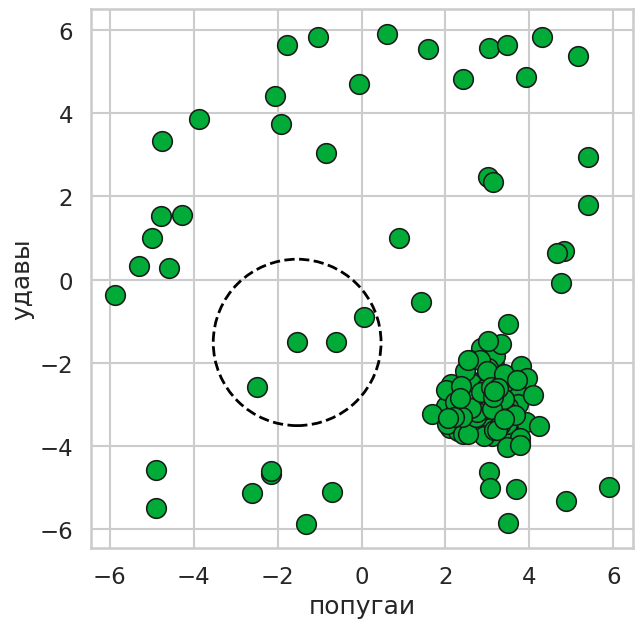

In [12]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(data, x='попугаи', y='удавы', 
                     color='#00ab37', s=200, edgecolor='k')
ax.add_artist(plt.Circle(data.loc[156, :].values, 2, color='black', 
                         fill=False, linestyle='--', linewidth=2))
plt.savefig("images/knn_data_circle.png", transparent=True, dpi=DPI)

In [13]:
neighbors = data[(data['попугаи'] < 1) & (data['попугаи'] > -3) & 
    (data['удавы'] < 0) & (data['удавы'] > -3)]

In [14]:
neighbors

,попугаи,удавы
156,-1.535783,-1.508750
166,0.063028,-0.909336
179,-0.618654,-1.501553
180,-2.481471,-2.571455


In [15]:
neighbors[(neighbors['попугаи'] < 0) & (neighbors['попугаи'] > -0.7)]

,попугаи,удавы
179,-0.618654,-1.501553


In [16]:
furthest = neighbors[(neighbors['попугаи'] < 0) & 
    (neighbors['попугаи'] > -0.7)].values.tolist()[0]

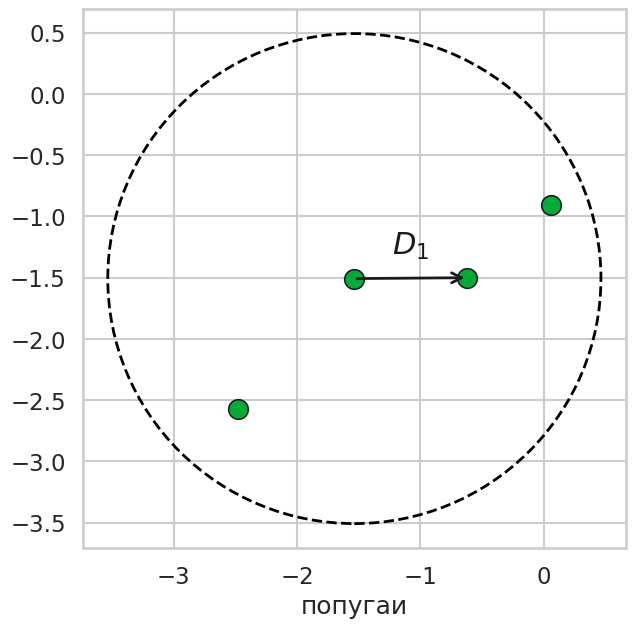

In [17]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(neighbors, x='попугаи', y='удавы', 
                     color='#00ab37', s=200, edgecolor='k')
ax.set_xlim(data.loc[156, 'попугаи'] - 2.2, data.loc[156, 'попугаи'] + 2.2)
ax.set_ylim(data.loc[156, 'удавы'] - 2.2, data.loc[156, 'удавы'] + 2.2)
ax.set(ylabel='')

ax.add_artist(plt.Circle(data.loc[156, :].values, 2, 
                         color='black', fill=False, linestyle='--', linewidth=2))

# Добавление стрелки от точки 156 до точки 156
ax.annotate('',
            xy=(neighbors['попугаи'][179], neighbors['удавы'][179]), 
            xytext=(neighbors['попугаи'][156], neighbors['удавы'][156]),
            arrowprops=dict(arrowstyle="->", color='k', lw=2))

ax.annotate(r'$D_1$',
            xy=((neighbors['попугаи'][179] + neighbors['попугаи'][156]) / 2,
                (neighbors['удавы'][179] + neighbors['удавы'][156]) / 2),
            xytext=((neighbors['попугаи'][179] + neighbors['попугаи'][156]) / 2,
                    (neighbors['удавы'][179] + neighbors['удавы'][156]) / 2 + 0.2),
            fontsize=22, color='k', ha='center')

plt.savefig("images/knn_d_1.png", transparent=True, dpi=DPI)

In [18]:
neighbors = data[(data['попугаи'] < -4) & (data['попугаи'] > -6) & 
    (data['удавы'] < 4) & (data['удавы'] > 0)]

In [19]:
neighbors

,попугаи,удавы
164,-4.762514,3.325763
188,-5.309295,0.332413
193,-4.595196,0.277174
194,-4.284100,1.552784
197,-4.786528,1.530697
198,-4.990718,1.011772


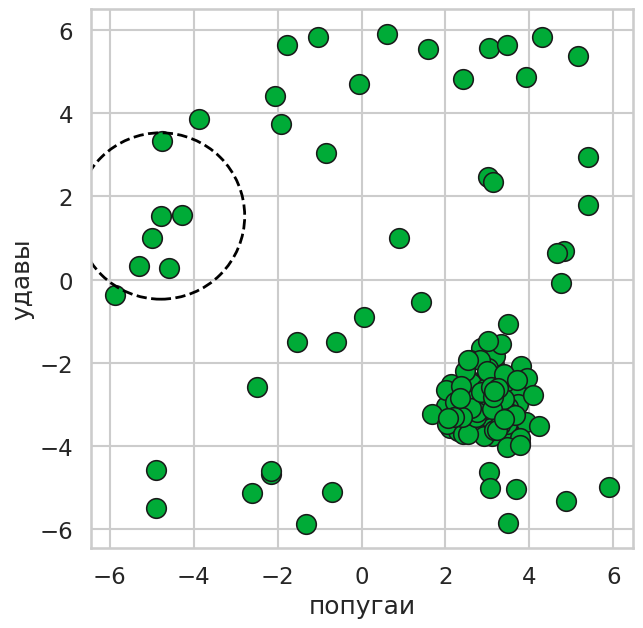

In [20]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(data, x='попугаи', y='удавы', 
                     color='#00ab37', s=200, edgecolor='k')
ax.add_artist(plt.Circle(data.loc[197, :].values, 2, 
                         color='black', fill=False, linestyle='--', linewidth=2))
plt.savefig("images/data_circle_other.png", transparent=True, dpi=DPI)

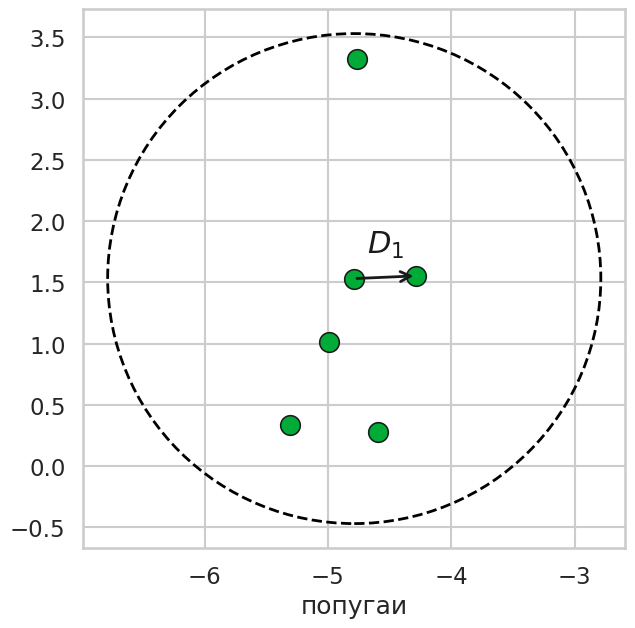

In [21]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(neighbors, x='попугаи', y='удавы', 
                     color='#00ab37', s=200, edgecolor='k')
ax.set_xlim(data.loc[197, 'попугаи'] - 2.2, data.loc[197, 'попугаи'] + 2.2)
ax.set_ylim(data.loc[197, 'удавы'] - 2.2, data.loc[197, 'удавы'] + 2.2)
ax.set(ylabel='')

ax.add_artist(plt.Circle(data.loc[197, :].values, 2, 
                         color='black', fill=False, linestyle='--', linewidth=2))

# Добавление стрелки от точки 197 до точки 194
ax.annotate('',
            xy=(neighbors['попугаи'][194], neighbors['удавы'][194]), 
            xytext=(neighbors['попугаи'][197], neighbors['удавы'][197]),
            arrowprops=dict(arrowstyle="->", color='k', lw=2))

ax.annotate(r'$D_1$',
            xy=((neighbors['попугаи'][197] + neighbors['попугаи'][194]) / 2,
                (neighbors['удавы'][197] + neighbors['удавы'][194]) / 2),
            xytext=((neighbors['попугаи'][197] + neighbors['попугаи'][194]) / 2,
                    (neighbors['удавы'][197] + neighbors['удавы'][194]) / 2 + 0.2),
            fontsize=22, color='k', ha='center')

plt.savefig("images/knn_d_1_other.png", transparent=True, dpi=DPI)

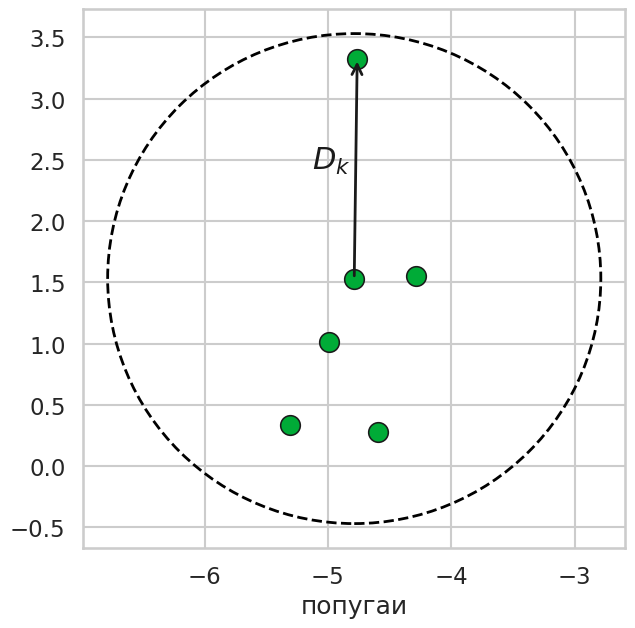

In [22]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(neighbors, x='попугаи', y='удавы', 
                     color='#00ab37', s=200, edgecolor='k')
ax.set_xlim(data.loc[197, 'попугаи'] - 2.2, data.loc[197, 'попугаи'] + 2.2)
ax.set_ylim(data.loc[197, 'удавы'] - 2.2, data.loc[197, 'удавы'] + 2.2)
ax.set(ylabel='')

ax.add_artist(plt.Circle(data.loc[197, :].values, 2, color='black', 
                         fill=False, linestyle='--', linewidth=2))

# Добавление стрелки от точки 197 до точки 164
ax.annotate('',
            xy=(neighbors['попугаи'][164], neighbors['удавы'][164]), 
            xytext=(neighbors['попугаи'][197], neighbors['удавы'][197]),
            arrowprops=dict(arrowstyle="->", color='k', lw=2))

ax.annotate(r'$D_k$',
            xy=((neighbors['попугаи'][197] + neighbors['попугаи'][164]) / 2,
                (neighbors['удавы'][197] + neighbors['удавы'][164]) / 2),
            xytext=((neighbors['попугаи'][197] + neighbors['попугаи'][164]) / 2 - 0.2,
                    (neighbors['удавы'][197] + neighbors['удавы'][164]) / 2),
            fontsize=22, color='k', ha='center')

plt.savefig("images/knn_d_k_other.png", transparent=True, dpi=DPI)

In [23]:
scaler = StandardScaler()

In [24]:
normalized_data = scaler.fit_transform(data)

In [25]:
clf = KNN()

In [26]:
clf.fit(normalized_data)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [27]:
y_train_scores = clf.decision_scores_

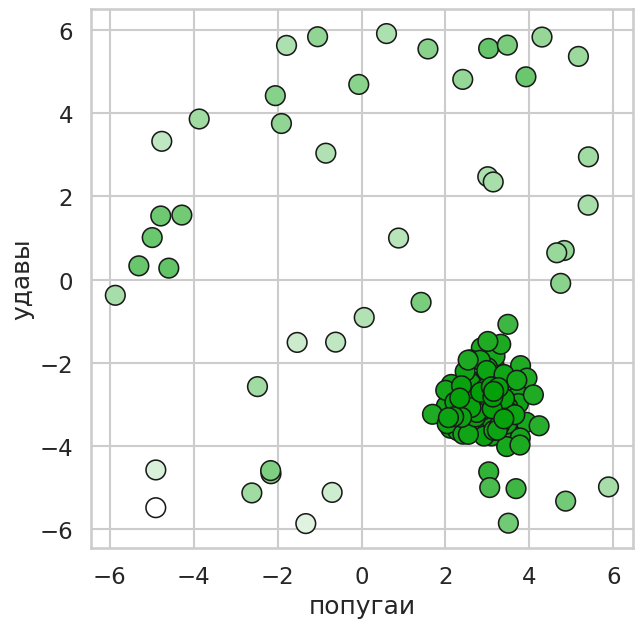

In [28]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data, x='попугаи', y='удавы', s=200, edgecolor='k', 
                hue=y_train_scores, palette=sns.color_palette(palette, as_cmap=True), legend=False)
plt.savefig("images/knn_anomalies.png", transparent=True, dpi=DPI)

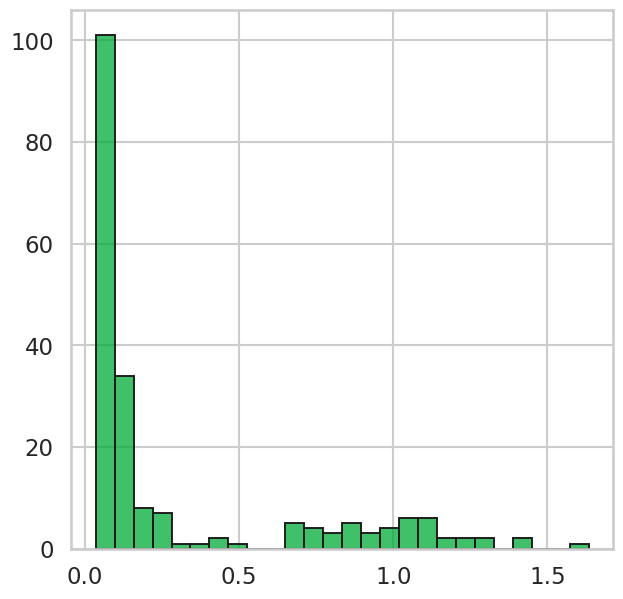

In [29]:
plt.figure(figsize=(7, 7))
ax = sns.histplot(y_train_scores, color='#00ab37', edgecolor='k')
ax.set(ylabel='')
plt.savefig("images/knn_score_histogram.png", transparent=True, dpi=DPI)